# Table of contents
1. Define the regions
2. Exclusion flag for customers with less than 5 orders
3. Profiling variable based on age, income, certain good in the 'department_id' column and number of dependants
   3.1 Age
   3.2 Income
   3.3 Number of dependants
4. Visualizations
5. Customer profiles based on region and departments
6. Income groups
7. Marital Status

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\olivi\OneDrive\Documents\Data Analytics\Data Analytics Immersion\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'orders_products_cst_all.pkl'))

In [4]:
# PII and the security implications.
# It is important to recognize the presence of PII that could post security and privacy riskes if not handled appropriately.
# To address the concerns we can consider anonymization such as removing or anonymizing the PII data. 
# We can evalutate the necessity of each PII column and decide how pertinent the info is to the analysis.
# We can also restrict access to the dataset especially the PII columns ensuring that only authorized individuals have access.

In [74]:
# 1. Define the regions
state_to_region = {
    # Region 1 (Northeast)
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast',
    'Connecticut': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',
    
    # Region 2 (Midwest)
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',
    
    # Region 3 (South)
    'Delaware': 'South',
    'Maryland': 'South',
    'District of Columbia': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'Kentucky': 'South',
    'Tennessee': 'South',
    'Mississippi': 'South',
    'Alabama': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    
    # Region 4 (West)
    'Idaho': 'West',
    'Montana': 'West',
    'Wyoming': 'West',
    'Nevada': 'West',
    'Utah': 'West',
    'Colorado': 'West',
    'Arizona': 'West',
    'New Mexico': 'West',
    'Alaska': 'West',
    'Washington': 'West',
    'Oregon': 'West',
    'California': 'West',
    'Hawaii': 'West'
}

# Map the 'state' column to the 'region' column
df['region'] = df['state'].map(state_to_region)

# Verify the new column
print(df[['state', 'region']].head())

     state region
0  Alabama  South
1  Alabama  South
2  Alabama  South
3  Alabama  South
4  Alabama  South


In [11]:
df.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'day_category',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'max_price',
       'Spending_rates', 'median_day_since_order', 'Order_frequency',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'dependants', 'fam_status', 'income', 'region'],
      dtype='object')

## 2. Exclusion flag for customers with less than 5 orders

In [14]:
df.loc[df['max_price'] > 5, 'spending_rates'] = 'Regular spender'

In [15]:
df.loc[df['max_price'] <= 5, 'spending_rates'] = 'Low spender'

In [18]:
# Filter out the customers who should be excluded. In this case it is those labeled 'Low spender'
filtered_df = df[df['spending_rates'] !=  'Regular spender']

In [19]:
# Filter out the 'Low spender' customers from our df
df_filtered =df[df['spending_rates'] != 'Low spender']

In [20]:
df = df_filtered

In [21]:
# Export the filtered DataFrame to a CSV file
filtered_df.to_csv(os.path.join(path, '02 Data' , 'Prepared Data' , 'filtered_customers.csv'))

## 3.Profiling variable based on age, income, certain good in the 'department_id' column and number of dependants

# 3.1 Age

In [28]:
#Creating age profiling variable
df.loc[df['age']<=25, 'age_group'] = 'Young adult'

In [29]:
df.loc[(df['age']>25)&(df['age']<65), 'age_group']='Adult'

In [30]:
df.loc[df['age']>=65, 'age_group']= 'Senior'

In [34]:
df['age_group'].value_counts(dropna = False)

age_group
Adult          20990901
Senior          9098103
Young adult     4291436
Name: count, dtype: int64

In [36]:
# Aggregate usage frequency by age group
df.groupby('age_group').agg({'days_since_order': ['mean' , 'min' , 'max']})

days_since_order           
                        mean  min   max
age_group                              
Adult              11.116781  0.0  30.0
Senior             11.080563  0.0  30.0
Young adult        11.094094  0.0  30.0

In [38]:
df.groupby('age_group').agg({'prices': ['mean','min','max']})

prices              
                  mean  min      max
age_group                           
Adult        12.032577  1.0  99999.0
Senior       11.769384  1.0  99999.0
Young adult  12.175529  1.0  99999.0

In [86]:
#Found prices at 99,999 and turned into NaNs
df.loc[df['prices'] >100, 'prices'] = np.nan

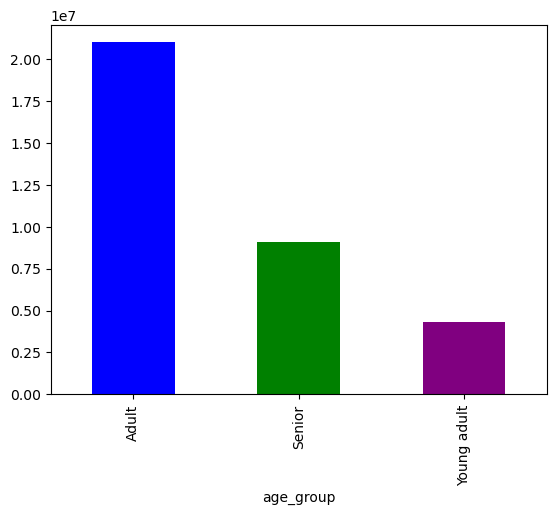

In [88]:
# Age profile visualization
bar=df['age_group'].value_counts().plot.bar(color=['blue','green','purple'])

In [89]:
# Export bar chat
bar.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'bar_agegroup.png'))

# 3.2 Income

In [93]:
df.loc[df['income'] <= 50000, 'income_group'] = 'Low'

In [95]:
df.loc[(df['income'] > 50000) & (df['income'] <= 100000), 'income_group']  = 'Middle'

In [97]:
df.loc[df['income']> 100000, 'income_group'] = 'High'

In [99]:
df['income_group'].value_counts(dropna = False)

income_group
High      15553068
Middle    14760274
Low        4067098
Name: count, dtype: int64

In [101]:
# Aggregate order frequency for income 
df.groupby('income_group').agg({'days_since_order' : ['mean','min','max']})

days_since_order           
                         mean  min   max
income_group                            
High                11.044610  0.0  30.0
Low                 11.549685  0.0  30.0
Middle              11.053334  0.0  30.0

In [103]:
# Aggregate expenditure for income
df.groupby('income_group').agg({'prices': ['mean','min','max']})

prices           
                  mean  min   max
income_group                     
High          7.959222  1.0  25.0
Low           6.699461  1.0  25.0
Middle        7.893944  1.0  25.0

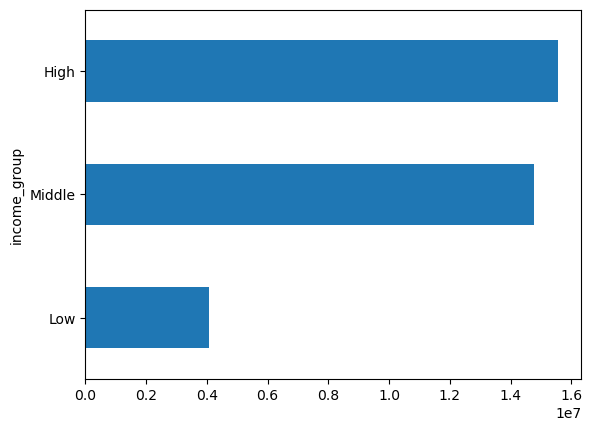

In [104]:
# Income profile visualization
bar2 = df['income_group'].value_counts().sort_values().plot.barh()

In [61]:
# Export bar chart
bar2.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'bar_incomegroup.png'))

# 3.3 Number of dependants

In [64]:
# Divide data into cst with dependants and cst without dependants
df.loc[df['dependants'] > 0, 'dependant_flag'] = 'Has dependants'

In [66]:
df.loc[df['dependants'] == 0, 'dependant_flag'] = 'No dependants'

In [68]:
# Data check
df['dependant_flag'].value_counts(dropna = False)

dependant_flag
Has dependants    25786046
No dependants      8594394
Name: count, dtype: int64

In [69]:
# Aggregate order frequency for dependant group
df.groupby('dependant_flag').agg({'days_since_order': ['mean' , 'min' , 'max']})

days_since_order           
                           mean  min   max
dependant_flag                            
Has dependants        11.111651  0.0  30.0
No dependants         11.082493  0.0  30.0

In [71]:
# Aggregate expenditure for dependant group
df.groupby('dependant_flag').agg({'prices':['mean','min','max']})

prices           
                    mean  min   max
dependant_flag                     
Has dependants  7.791698  1.0  25.0
No dependants   7.790333  1.0  25.0

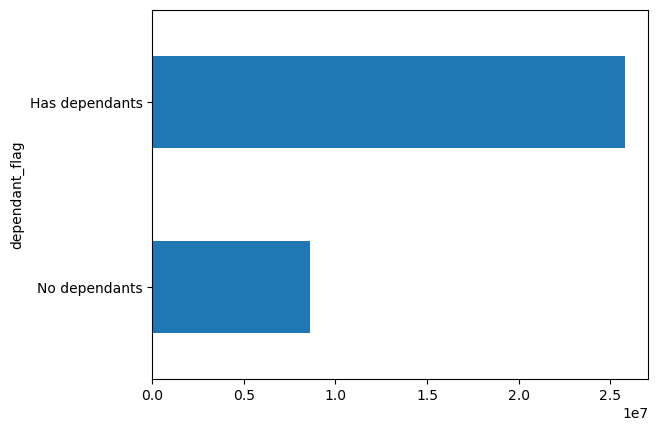

In [500]:
bar3 = df['dependant_flag'].value_counts().sort_values().plot.barh()

In [501]:
# Export bar chart
bar3.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'bar_dependantgroup.png'))

# 4. Visualizations

In [503]:
print(df.columns)

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'day_category',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'max_price',
       'Spending_rates', 'median_day_since_order', 'Order_frequency',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'dependants', 'fam_status', 'income', 'region', 'spending_rates',
       'age_group', 'income_group', 'dependant_flag'],
      dtype='object')


In [504]:
df_user_sample = df[['user_id' , 'age_group' , 'income_group' , 'dependant_flag' , 'region' , 'loyalty_flag']]

In [505]:
# Remove duplicates 
df_user_sample = df_user_sample.drop_duplicates()

In [506]:
df_user_sample.head()

,user_id,age_group,income_group,dependant_flag,region,loyalty_flag
0,1,Adult,Low,Has dependants,South,New customer
10,2,Senior,Middle,Has dependants,West,Regular customer
22,3,Adult,Middle,Has dependants,West,Regular customer
27,4,Adult,Low,Has dependants,South,New customer
28,5,Senior,High,No dependants,West,NaN


Text(0.5, 0, 'Region')

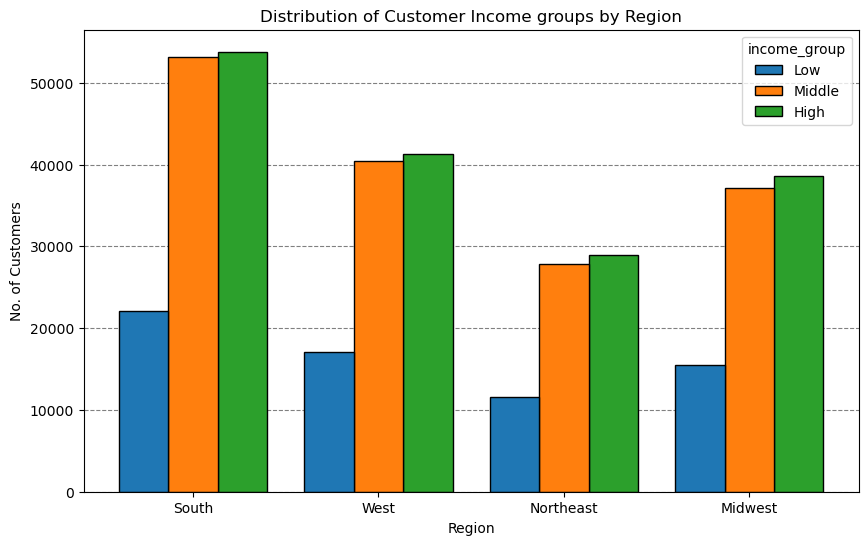

In [507]:
# A histogram could work to show the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=df_user_sample, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

In [508]:
# Save fig
plt.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'instacart_income_by_region.png'))

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Region')

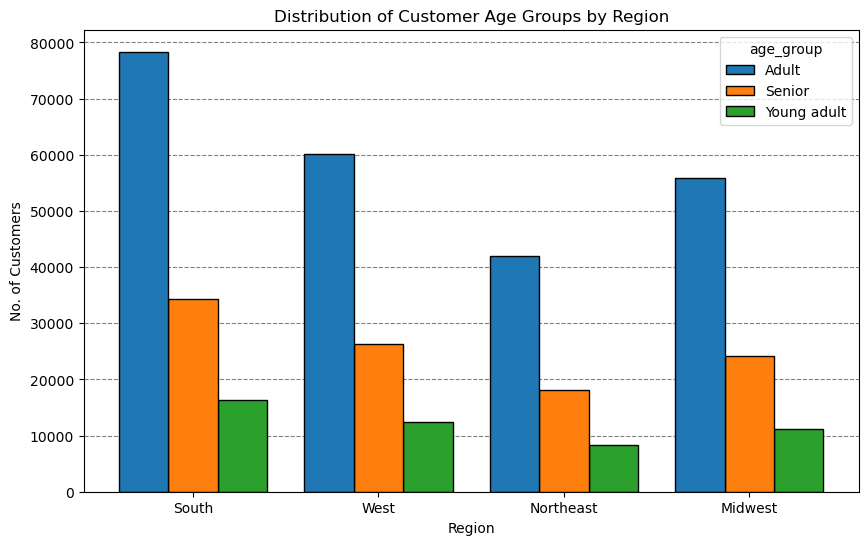

In [509]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=df_user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

In [510]:
# An aggregated subset of data with 'prices' column as the total cost of each order:
orders_subset = df.groupby(['user_id', 'age_group', 'income_group', 'dependant_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_order'])['prices'].sum().reset_index()

In [511]:
# Rename 'prices' to 'order_total'
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [512]:
# Check subset
orders_subset

,user_id,age_group,income_group,dependant_flag,loyalty_flag,region,order_number,days_since_order,order_total
0,1,Adult,Low,Has dependants,New customer,South,1.0,11.11484,31.6
1,1,Adult,Low,Has dependants,New customer,South,2.0,15.00000,35.4
2,1,Adult,Low,Has dependants,New customer,South,3.0,21.00000,28.2
3,1,Adult,Low,Has dependants,New customer,South,4.0,29.00000,26.0
4,1,Adult,Low,Has dependants,New customer,South,5.0,28.00000,57.0
...,...,...,...,...,...,...,...,...,...
3212701,206209,Senior,High,Has dependants,Regular customer,Midwest,9.0,22.00000,26.2
3212702,206209,Senior,High,Has dependants,Regular customer,Midwest,10.0,29.00000,64.7
3212703,206209,Senior,High,Has dependants,Regular customer,Midwest,11.0,30.00000,56.1
3212704,206209,Senior,High,Has dependants,Regular customer,Midwest,12.0,18.00000,131.5


In [513]:
# max, min, mean by age category
aggregations_by_age_cat = orders_subset.groupby('age_group').agg({'days_since_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_age_cat

days_since_order                  order_total                   
                         min       mean   max         min       mean     max
age_group                                                                   
Adult                    0.0  10.738660  30.0         0.0  78.657931  1092.2
Senior                   0.0  10.711099  30.0         0.0  78.290983   787.0
Young adult              0.0  10.726054  30.0         0.0  78.745681   842.1

In [514]:
# It seems that all age groups spend on avg the same and order the roughly the same amount of times

In [515]:
# max, min, mean by age category
aggregations_by_income_cat = orders_subset.groupby('income_group').agg({'days_since_order' : ['min', 'mean', 'max'],
                                                                        'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_income_cat

days_since_order                  order_total                   
                          min       mean   max         min       mean     max
income_group                                                                 
High                      0.0  10.585681  30.0         0.0  83.819068  1092.2
Low                       0.0  11.464446  30.0         1.0  52.618085   875.0
Middle                    0.0  10.630915  30.0         0.0  81.898890   852.5

In [516]:
# low income seem to shop less often and spend less each trip

In [517]:
# max, min, mean by dependents category
aggregations_by_dependents_cat = orders_subset.groupby('dependant_flag').agg({'days_since_order' : ['min', 'mean', 'max'],
                                                                               'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_dependents_cat

days_since_order                  order_total             \
                            min       mean   max         min       mean   
dependant_flag                                                            
Has dependants              0.0  10.733964  30.0         0.0  78.637500   
No dependants               0.0  10.717207  30.0         0.0  78.373349   

                        
                   max  
dependant_flag          
Has dependants  1092.2  
No dependants    875.0

In [518]:
# there seems to be little difference between those with dependants and those without 

In [519]:
df.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,...,age,date_joined,dependants,fam_status,income,region,spending_rates,age_group,income_group,dependant_flag
0,195.0,196.0,Soda,77.0,7.0,9.0,2539329.0,1,1.0,2.0,...,31,2/17/2019,3,married,40423,South,Regular spender,Adult,Low,Has dependants
1,195.0,196.0,Soda,77.0,7.0,9.0,2398795.0,1,2.0,3.0,...,31,2/17/2019,3,married,40423,South,Regular spender,Adult,Low,Has dependants
2,195.0,196.0,Soda,77.0,7.0,9.0,473747.0,1,3.0,3.0,...,31,2/17/2019,3,married,40423,South,Regular spender,Adult,Low,Has dependants
3,195.0,196.0,Soda,77.0,7.0,9.0,2254736.0,1,4.0,4.0,...,31,2/17/2019,3,married,40423,South,Regular spender,Adult,Low,Has dependants
4,195.0,196.0,Soda,77.0,7.0,9.0,431534.0,1,5.0,4.0,...,31,2/17/2019,3,married,40423,South,Regular spender,Adult,Low,Has dependants


# 5. Customer profiles based on region and departments

In [521]:
# Get names of each department back into the data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [522]:
#Rename column 'Unnamed: 0' to 'department_id'

df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [523]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [524]:
# Turning department dataframe into data dictionary
zipped = zip (df_dept['department_id'], df_dept['department'])
data_dict = dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [525]:
# Connect department names to department_id in dataframe

df['department'] = df['department_id'].map(data_dict)

In [526]:
# Checking dataframe

df.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,...,date_joined,dependants,fam_status,income,region,spending_rates,age_group,income_group,dependant_flag,department
0,195.0,196.0,Soda,77.0,7.0,9.0,2539329.0,1,1.0,2.0,...,2/17/2019,3,married,40423,South,Regular spender,Adult,Low,Has dependants,beverages
1,195.0,196.0,Soda,77.0,7.0,9.0,2398795.0,1,2.0,3.0,...,2/17/2019,3,married,40423,South,Regular spender,Adult,Low,Has dependants,beverages
2,195.0,196.0,Soda,77.0,7.0,9.0,473747.0,1,3.0,3.0,...,2/17/2019,3,married,40423,South,Regular spender,Adult,Low,Has dependants,beverages
3,195.0,196.0,Soda,77.0,7.0,9.0,2254736.0,1,4.0,4.0,...,2/17/2019,3,married,40423,South,Regular spender,Adult,Low,Has dependants,beverages
4,195.0,196.0,Soda,77.0,7.0,9.0,431534.0,1,5.0,4.0,...,2/17/2019,3,married,40423,South,Regular spender,Adult,Low,Has dependants,beverages


In [527]:
# Creating crosstab for region and department

region_dep = pd.crosstab(df['department'], df['region'], dropna = False)

In [528]:
# Checking Crosstab

region_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,36182,26559,51630,39356
babies,98983,75138,143654,106026
bakery,273866,208599,388813,301144
beverages,625425,483265,898631,679939
breakfast,163771,123746,234616,181924
bulk,8193,5802,11533,9045
canned goods,250700,186750,356012,274583
dairy eggs,1264111,953998,1796869,1383467
deli,245678,186806,349401,269306


Text(0.5, 0, 'Department')

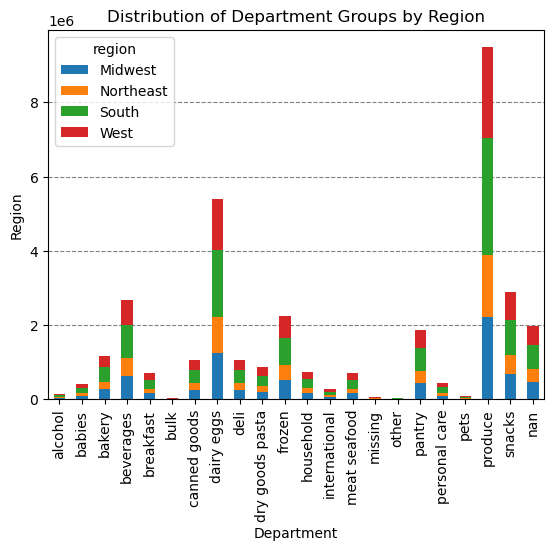

In [529]:
# Region_department Bar Chart

bar5 = region_dep.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Region')
plt.xlabel('Department')

In [530]:
# Export bar chart
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

Text(0.5, 0, 'Region')

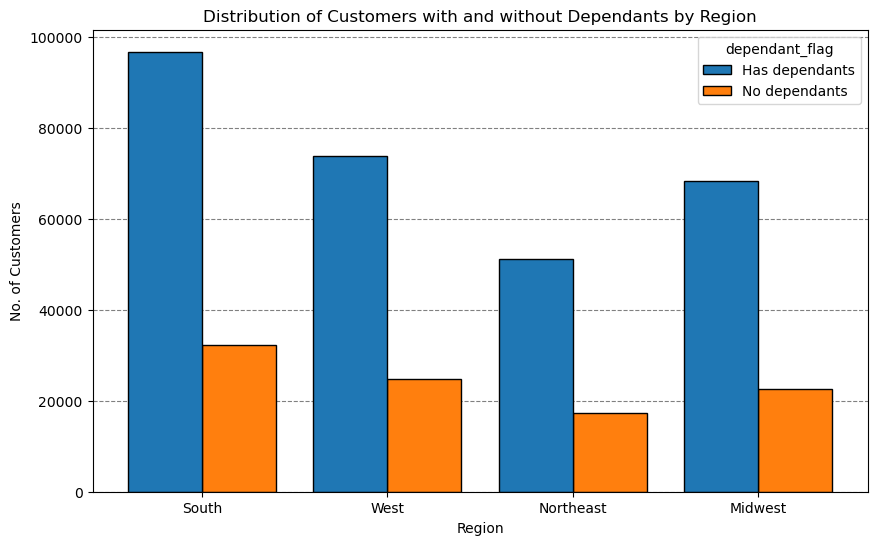

In [531]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=df_user_sample, x='region', hue='dependant_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependants by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

In [532]:
# export graph
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_dependents_by_region.png'), bbox_inches = 'tight')

<Figure size 640x480 with 0 Axes>

In [109]:
# Define price_label function
def price_label(row):
    if row['prices'] <= 5:
       return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
       return 'Mid-range product'
    elif row['prices'] > 15:
       return 'High range'
    else: return 'Not enough data'

In [ ]:
#Apply the function
df['price_range'] = df.apply(price_label, axis=1)

In [ ]:
# Creating crosstab for region and price range

region_pricerange = pd.crosstab(df['region'], df['price_range'], dropna = False)


In [ ]:
# Checking crosstab

region_pricerange

In [ ]:
# Region_pricerange Bar Chart

bar6 = region_pricerange.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of price_range by Region')
plt.ylabel('price_range ')
plt.xlabel('Region')


In [ ]:
# Exporting bar chart
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_pricerange.png'))

In [ ]:
# Income groups

In [ ]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = df.groupby(['income_group', 'department']).size().reset_index(name='counts')
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = plt.cm.viridis(np.linspace(0, 2, 8))  # Sets colour palette

# Define the desired order of income groups
desired_order = ['High', 'Middle', 'Low']

# Iterate over each income group and create a horizontal bar chart
for i, income_group in enumerate(desired_order):
    income_data = income_department_counts[income_department_counts['income_group'] == income_group].head(5)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {income_group}-earners')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping

In [ ]:
# Things to note here. Besides 'produce' the top departments different between income groups. higher earners are more likely to buy 'dairy/eggs' whereas low-earners buy from 'snacks' more often

In [ ]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_Income_group.png'), bbox_inches = 'tight')

In [ ]:
# Group by age_group and department, count occurrences, and sort
age_department_counts = df.groupby(['age_group', 'department']).size().reset_index(name='counts')
age_department_counts.sort_values(by=['age_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(4, 1, figsize=(12, 24))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
desired_age_order = ['Senior', 'Older adult', 'Adult', 'Young Adult']

# Iterate over each age group and create a horizontal bar chart
for i, age_group in enumerate(desired_age_order):
    age_data = age_department_counts[age_department_counts['age_group'] == age_group].head(5)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group}s')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 3500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping

In [ ]:
# different age groups dont show differences betweeen departents they purchase most products from.

In [ ]:
# export 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_age_group.png'), bbox_inches = 'tight')

# 6. Income groups

In [ ]:
# Create a column for frequet users
df['Customer_frequency'] = df.groupby(['user_id'])['days_since_order'].transform(np.median)

In [ ]:
# Creating flag on order frequency
df.loc[df['Customer_frequency'] > 20, 'frequency_flag'] = 'Non_frequent_customer'

df.loc[(df['Customer_frequency']>10) & (df['Customer_frequency']<=20),'frequency_flag'] = 'Regular customer'

df.loc[df['Customer_frequency'] <= 10, 'frequency_flag'] = 'Frequent Customer'

In [ ]:
# Creating crosstab for income and frequency

income_freq = pd.crosstab(df['income_group'], df['frequency_flag'], dropna = False)

In [ ]:
# Checking crosstab

income_freq

In [ ]:
# Income Group and Order frequency Bar Chart

bar7 = income_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Income_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Income_group')


In [ ]:
# Exporting bar chart

bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_frequency.png'))

In [ ]:
# Creating crosstab for age and frequency

age_freq = pd.crosstab(df['age_group'], df['frequency_flag'], dropna = False)

In [ ]:
# Checking crosstab

age_freq

In [ ]:
# Region Price Range Bar Chart

bar8 = age_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Age_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Age_group')

In [ ]:
# Exporting bar chart

bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_freq.png'))

In [ ]:
# Marital Status

7. Marital Status

In [ ]:
#Rename column 'Unnamed: 0' to 'department_id'

df.rename(columns = {'Family Status':'Marital_status'}, inplace = True)

In [ ]:
# Creating crosstab for marital status and frequency

marital_freq = pd.crosstab(df['fam_status'], df['frequency_flag'], dropna = False)

In [ ]:
# Checking crosstab

marital_freq

In [ ]:
#Marital_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Marital_status  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Marital_status')

In [ ]:
# Exporting bar chart

bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_freq.png'))

In [ ]:
# Departments

In [ ]:
# Creating crosstab for department and frequency
dep_freq = pd.crosstab(df['department'], df['frequency_flag'], dropna = False)

In [ ]:
# Checking crosstab
dep_freq

In [ ]:
#dept_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('department')

In [ ]:
# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency.png'))

In [ ]:
# Final Data Set

In [ ]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_full_data.pkl'))

In [ ]:
# Top 10 departments for instacart

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

df['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, 
                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()

In [ ]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Instacart_department_sales.png'), bbox_inches = 'tight')

In [ ]:
# Frequency count
df['department'].value_counts(dropna=False)

In [ ]:
# ordering habits based on loyalty status
# Compute average order_total
loyalty_order_total = orders_subset.groupby('loyalty_flag')['order_total'].mean().sort_values(ascending = False).reset_index()

In [ ]:
# Check
loyalty_order_total

In [ ]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['green', 'red', 'blue']

# Plot bars
bars = plt.bar(loyalty_order_total['loyalty_flag'], loyalty_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')

In [ ]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

In [ ]:
# Average price of products purchased
product_avg_cost = df.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [ ]:
# Check
product_avg_cost

In [ ]:
# Set up formatting and colours
plt.figure(figsize=(6, 6))
colors = ['blue', 'green', 'yellow']

# Plot bars
bars = plt.bar(product_avg_cost['loyalty_flag'], product_avg_cost['prices'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Cost of Products Bought by Instacart Customers")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Product Price ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')

In [ ]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_product_price_by_loyalty.png'), bbox_inches = 'tight')

In [ ]:
# Total product orders
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
df['region'].value_counts().sort_index().plot.bar(color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')

In [ ]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_total_orders_by_region.png'), bbox_inches = 'tight')

In [ ]:
# Average order_total
region_avg_order_total = orders_subset.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [ ]:
# Check
region_avg_order_total

In [ ]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(region_avg_order_total['region'], 
               region_avg_order_total['order_total'], 
               color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
               edgecolor='black', 
               zorder=2, 
               alpha = 1)
plt.title("Average Order Total by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')

In [ ]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_region.png'), bbox_inches = 'tight')

In [ ]:
# Difference in ordering habits of different customer profiles

In [ ]:
# Income groups by the mean of the order_total - multilevel index
sorted_df = aggregations_by_income_cat.sort_values(by=('order_total', 'mean'), ascending=False)

In [ ]:
# Check
sorted_df

In [ ]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(sorted_df.index, sorted_df['order_total', 'mean'], color=['purple', 'green', 'blue'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

In [ ]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_amount_by_income.png'), bbox_inches = 'tight')

In [ ]:
# Graph
plt.figure(figsize=(8, 10)) 
ax = crosstab1_norm.plot(kind='bar', stacked=True, zorder=2, edgecolor='black')

# To show percentages on each section:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'  # Format as percentage
    ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center')

plt.title('Frequency by Income Group (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.legend(title='Frequency',loc='upper left', bbox_to_anchor=(1.05, 1))

In [ ]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_customer_frequency_by_income.png'), bbox_inches = 'tight')

In [ ]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=df_user_sample, x='dependant_flag', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups with Dependants')
plt.ylabel('No. of Customers')
plt.xlabel('Dependants')

In [ ]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_dependants.png'), bbox_inches = 'tight')